#ToDo: 
#Color assignment leads to change of color <-> opinion relation during processing
#Sometimes list index out of range error
#process1 and process2 share common code -> simplify
#Animation
#use spring model and make animation of "shrinking subnetworks"

In [32]:
#This is just the path to my computer's module directory
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')

#Import networkx for graph stuff (based on matplotlib)
import networkx as nx
#Import matplotlib for any plotting
import matplotlib.pyplot as plt
#Import random for creating random numbers
import random
#import scipy and numpy for scientifc calculations, numerics, np.pi=3.141... etc
import scipy
import numpy
#import count from itertools used for counting
from itertools import count

#-----------------------------------------------------------------------------------------
#INPUT PARAMETERS


#Number of Nodes, Eges and possible Opinions in the system, can be modified
NNodes = 50
NEdges = 30
NOpinions = 7

#Probability for process1 = phi,  1-phi for process 2
phi = 0.5

#Number of Iterations for procedure
iter_process = 1

#------------------------------------------------------------------------------------------

#Function that initializes Graph
def init_Graph():
    #Create Random Graph
    G = nx.gnm_random_graph(NNodes, NEdges)

    #Assign opinions by random to Node
    for i in range(NNodes):
        G.node[i]["opinion"]= random.randint(1, NOpinions)
    
    #Return Graph as G
    return G
    

In [33]:
#Function that makes a single application of the first process described in the script on the graph:
#"get a new friend who has the same opinion"
#Removes a random connection of a rnd Node  and adds a connection from this node to a node with the same opinion
def process1():
    #Choose random Node
    curr_node = random.randint(0,NNodes-1)
    
    #Get Opinion of current Node
    curr_opinion = G.node[curr_node].get("opinion")
    
   #print("curr_node", curr_node, "degree", G.degree(curr_node), "curr_opinion", curr_opinion)
    
    #Cancel if no Neighbors!
    if G.degree(curr_node)== 0:
        return 
    
    #Choose rnd Neighbor
    chosen_neighbor = random.randint(0,G.degree(curr_node)-1)
    chosen_neighbor = list(G.neighbors(curr_node))[chosen_neighbor]
    
    print("chosen_neighbor", chosen_neighbor)
    
    #Remove Edge between Current Node and neighbor
    old_edge = (curr_node, chosen_neighbor)
    G.remove_edge(*old_edge)

    #Choose rnd Node that has same opinion but is not yet connected
    #Get Nodes with same opinion
    Same_Opinion= [x for x,y in G.nodes(data=True) if y['opinion']==curr_opinion]
    #iterate through list
    for i in range(len(Same_Opinion)):
        #exclude: No more unconnected nodes with same opinion
        if len(Same_Opinion) == 0:
            break
        print("Same Opinion", Same_Opinion)
        #pick random node with same opinion
        newNeighbor = random.choice(Same_Opinion)
        #if Node is already connected, delete node from list and continue
        if G.has_edge(curr_node, newNeighbor):
            Same_Opinion.remove('newNeighbor')
        #if not break
        else:
            break
    
    #Add Edge between current Node and newNeighbor
    new_edge = (curr_node, newNeighbor)
    G.add_edge(*new_edge)
    
    return

In [34]:
#Second process
#"changes opinions of friends"
#Picks Random Node, picks neighbour of random node, adapts neighbours' opinion
def process2():
    #Choose random Node
    curr_node = random.randint(0,NNodes-1)
    
    #Get Opinion of current Node
    curr_opinion = G.node[curr_node].get("opinion")
    
    #print("curr_node", curr_node, "degree", G.degree(curr_node), "curr_opinion", curr_opinion)
    
    #Cancel if no Neighbors!
    if G.degree(curr_node)== 0:
        return 
    
    #get neighbor of curr_node
    chosen_neighbor = random.randint(0,G.degree(curr_node)-1)
    chosen_neighbor = list(G.neighbors(curr_node))[chosen_neighbor]
    
    #set opinion of neighbor to opinion of curr node
    G.node[chosen_neighbor]["opinion"] = curr_opinion
    return

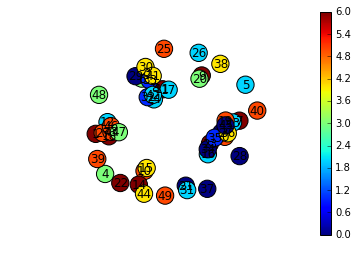

chosen_neighbor 42
Same Opinion [5, 12, 13, 16, 17, 24, 26, 31, 42]
30


In [35]:
#Initialize
G = init_Graph()

#nx.get_node_attributes(G,'opinion') gives dictionary in the form of "Node1" : "OpinionOfNode1", "Node2" : "OpinionOfNode2", ...
#nx.get_node_attributes(G,'opinion'),values() gives list of the form "OpinionOfNode1", "OpinionOfNode2", ....
#set(nx.get_node_attributes(G,'opinion').values()) gives list of all appearing opinions in the system, normally all possibility values for random.randint(1, NOpinions) when NumberOfNodes >> NumberOfOpinions
groups = set(nx.get_node_attributes(G,'opinion').values())

#creates dictionary of the form 1: Opinion1, 2: Opinion2, 3: Opinion3, ...
#useful when opinion not just count from 0 to NumberOfOpinions-1
#only used for colors
#Defines Relation between opinion and a value that will be associated with a color in the plot
mapping = dict(zip(sorted(groups),count()))

#Create List by appending for every node the number defined in the dictionary that is associated with it's opinion
colors = [mapping[G.node[n]['opinion']] for n in G.nodes]

#Choose Layout for Representation! May be useful to update during processing to see Nodes moving!!!!!
pos = nx.layout.spring_layout(G)

#Add Plot for Edges and Nodes 
#G is our Graph, pos is defined by the choice of layout
es = nx.draw_networkx_edges(G, pos) 
#G is our Graph, pos is the chosen layout, node_color is set to the color list created above, cmap=plt.cm.rainbow or other could be used to make it more beautiful
ns = nx.draw_networkx_nodes(G, pos, node_color=colors)
#Plot Labels(Number of Node)
nx.draw_networkx_labels(G, pos=pos)

#create colorbar
plt.colorbar(ns)

#disable axis
plt.axis('off')
#show graph
plt.show()

for i in range(iter_process):
    if random.uniform(0, 1) < phi:
        process1()
    else:
        process2()
        colors = [mapping[G.node[n]['opinion']] for n in nodes]
        es = nx.draw_networkx_edges(G, pos) 
        ns = nx.draw_networkx_nodes(G, pos, node_color=colors)
        nx.draw_networkx_labels(G, pos=pos)
        plt.colorbar(ns)
        plt.axis('off')
        plt.show()

print(G.number_of_edges())

